In [225]:
#Import libraries needed
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import sklearn.model_selection
import warnings
warnings.filterwarnings("ignore")
import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.predictor import csv_serializer
from sklearn.metrics import mean_squared_error
import boto3
import sagemaker
from sagemaker.xgboost.estimator import XGBoost
from sagemaker.session import Session
from sagemaker.inputs import TrainingInput

In [226]:
# Set up the environment in SageMaker
session = sagemaker.Session()
role = get_execution_role()

In [227]:
#Pulling our updated data in
s3_client = boto3.client("s3")
BUCKET='ecinema'
KEY='movieedit/movieedit.csv'

response = s3_client.get_object(Bucket=BUCKET, Key=KEY)
ME = pd.read_csv(response.get("Body"))
ME.head(2)

,MovieName,Avg_GrossW,Metascore,Meta_Pos_Count,Meta_Neut_Count,Meta_Neg_Count,User_Score,User_Pos_Count,User_Neut_Count,User_Neg_Count,Runtime_Value,Rated
0,'71,127085,83,32,2,0,7.5,119,2,6,99,7
1,10 Cloverfield Lane,6006917,76,38,3,2,7.7,796,3,2,104,7


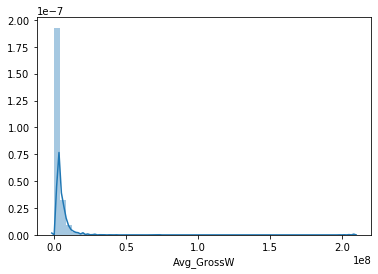

In [228]:
# Let's see the distribution of the response variable (house price)
sns.distplot(ME['Avg_GrossW'])

In [229]:
#Data is very skewed,so we need to remove the skew
log_ = np.log(ME['Avg_GrossW'])
log_.skew()

-0.4304925456033717

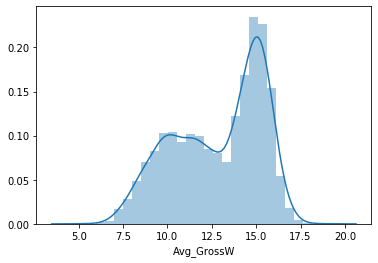

In [230]:
#checking if log worked
sns.distplot(log_)

In [231]:
#Splitting X and Y
X = ME.drop(['MovieName','Avg_GrossW'], axis=1)
Y = pd.DataFrame(log_)

# Look at the top 5 observations
X.head()

,Metascore,Meta_Pos_Count,Meta_Neut_Count,Meta_Neg_Count,User_Score,User_Pos_Count,User_Neut_Count,User_Neg_Count,Runtime_Value,Rated
0,83,32,2,0,7.5,119,2,6,99,7
1,76,38,3,2,7.7,796,3,2,104,7
2,54,9,8,3,5.6,4,1,3,82,3
3,61,7,11,0,6.1,2,2,1,100,3
4,34,4,8,17,4.7,50,18,57,109,2


In [ ]:
#'Metascore','Meta_Pos_Count','Meta_Neut_Count','Meta_Neg_Count','User_Score','User_Pos_Count','User_Neut_Count','User_Neg_Count','Runtime_Value','Rated'

In [232]:
# Look at the top 5 observations
Y.head()

,Avg_GrossW
0,11.752611
1,15.608422
2,10.231495
3,10.836498
4,15.659063


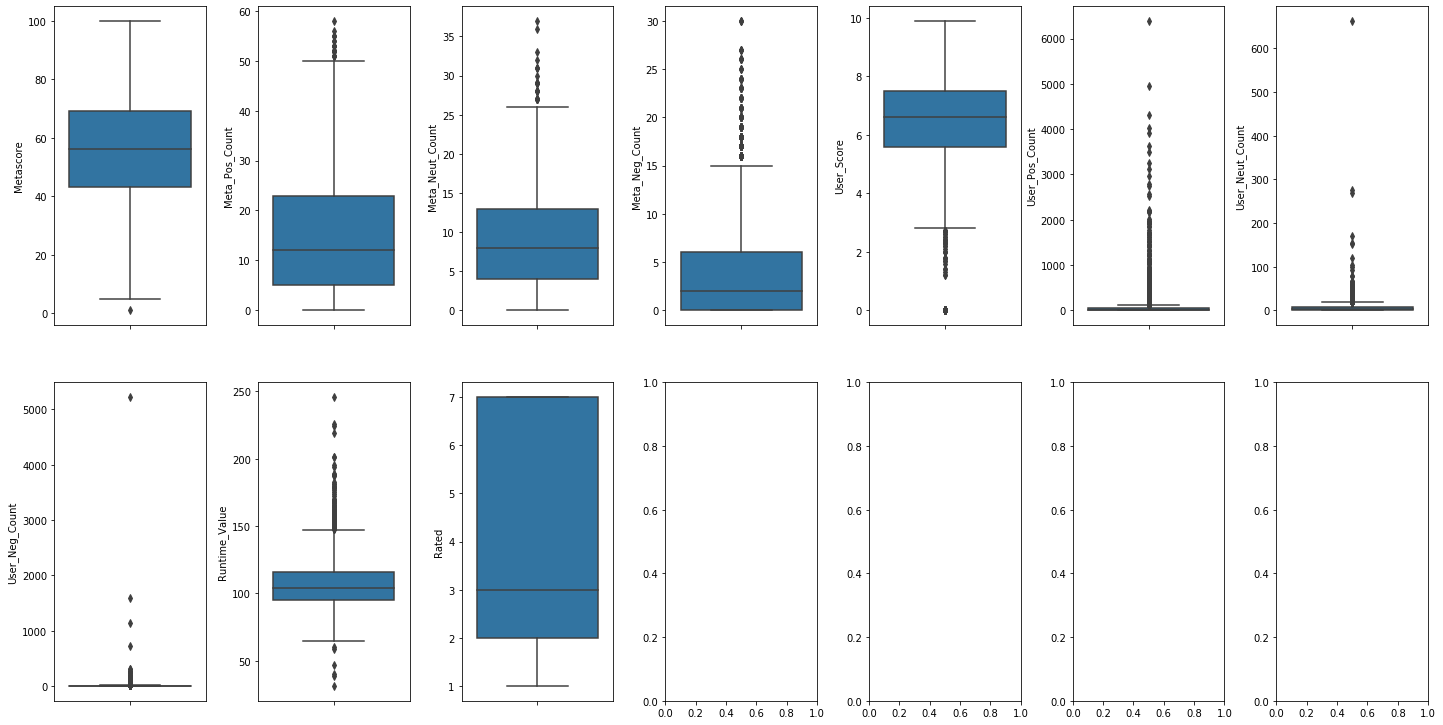

In [233]:
# Explore the distribution of our features
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.boxplot(y=k, data=X, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

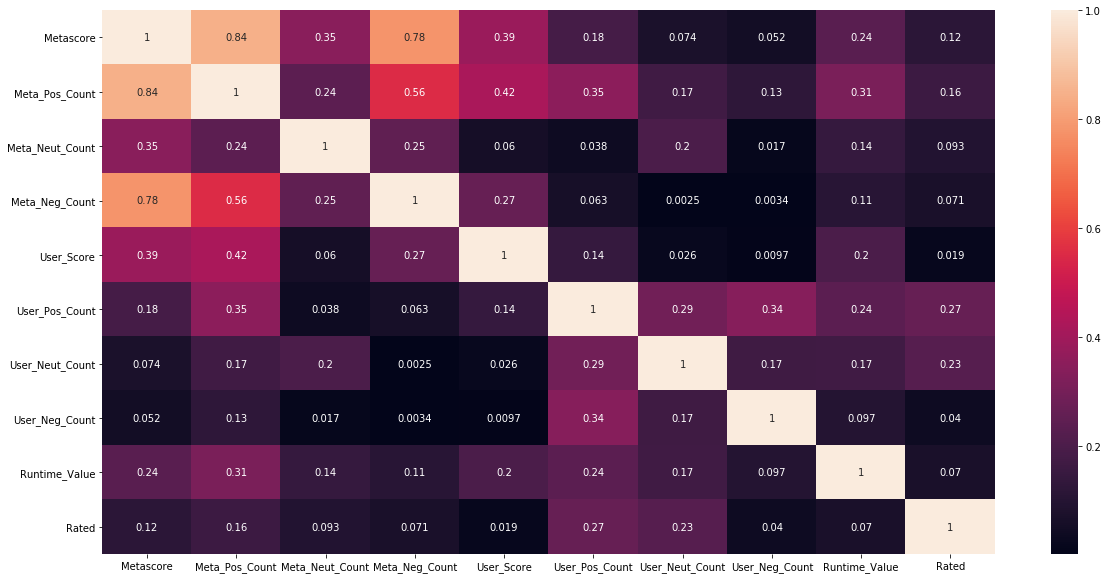

In [234]:
# Measure the correlations between features
plt.figure(figsize=(20, 10))
sns.heatmap(X.corr().abs(),  annot=True)

In [235]:
# Let's see the distribution of the response variable (house price)
#sns.distplot(Y)

In [236]:
#Data is very skewed,so we need to remove the skew
# log_Y = np.log(Y)
# log_Y.skew()

In [237]:
#checking if log worked
# sns.distplot(log_Y)

In [251]:
from sklearn import preprocessing
import pandas as pd
xd = preprocessing.normalize(X)
scaled_x = pd.DataFrame(xd,columns=['Metascore','Meta_Pos_Count','Meta_Neut_Count','Meta_Neg_Count','User_Score','User_Pos_Count','User_Neut_Count','User_Neg_Count','Runtime_Value','Rated'])
scaled_x.head()

,Metascore,Meta_Pos_Count,Meta_Neut_Count,Meta_Neg_Count,User_Score,User_Pos_Count,User_Neut_Count,User_Neg_Count,Runtime_Value,Rated
0,0.463808,0.178818,0.011176,0.000000,0.041910,0.664978,0.011176,0.033528,0.553217,0.039116
1,0.094137,0.047069,0.003716,0.002477,0.009538,0.985963,0.003716,0.002477,0.128819,0.008671
2,0.543810,0.090635,0.080564,0.030212,0.056395,0.040282,0.010071,0.030212,0.825786,0.030212
3,0.516537,0.059275,0.093146,0.000000,0.051654,0.016936,0.016936,0.008468,0.846783,0.025403
4,0.243447,0.028641,0.057282,0.121724,0.033653,0.358011,0.128884,0.408132,0.780463,0.014320


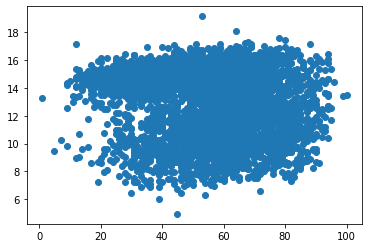

In [144]:
#checking which variables are showcasing a relationship
plt.scatter(X_train['Metascore'], Y_train)

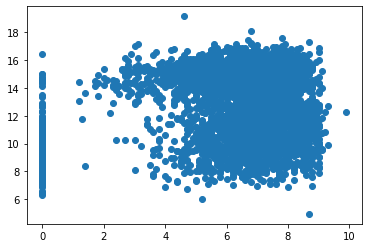

In [145]:
plt.scatter(X_train['User_Score'], Y_train)

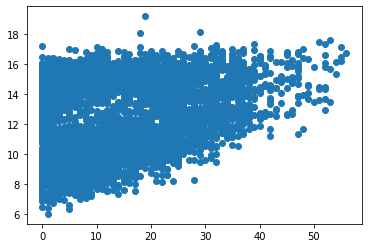

In [42]:
plt.scatter(X_train['Meta_Pos_Count'], Y_train)

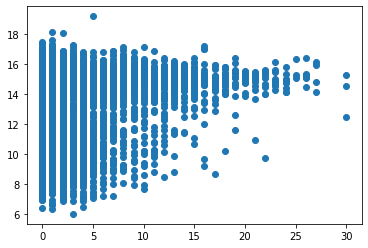

In [43]:
plt.scatter(X_train['Meta_Neg_Count'], Y_train)

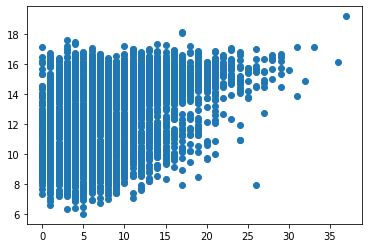

In [44]:
plt.scatter(X_train['Meta_Neut_Count'], Y_train)

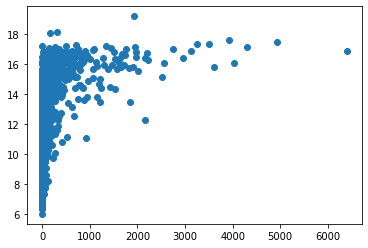

In [45]:
plt.scatter(X_train['User_Pos_Count'], Y_train)

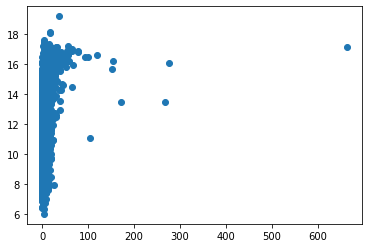

In [46]:
plt.scatter(X_train['User_Neut_Count'], Y_train)

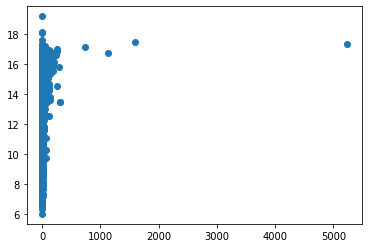

In [47]:
plt.scatter(X_train['User_Neg_Count'], Y_train)

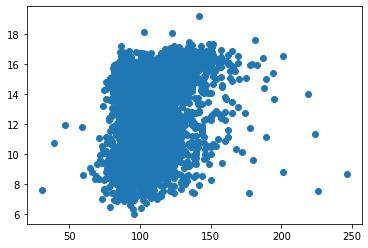

In [48]:
plt.scatter(X_train['Runtime_Value'], Y_train)

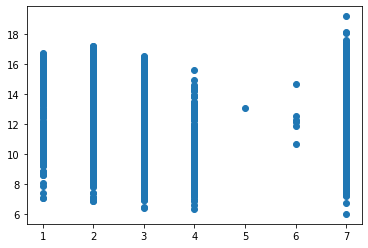

In [49]:
plt.scatter(X_train['Rated'], Y_train)

In [82]:
#.5169
#X = X.drop(['Rated','Runtime_Value' ], axis=1)

In [ ]:
#.5255
#Keep all

In [97]:
#.0632
#X = pd.DataFrame(ME[['Metascore', 'User_Score']])

In [112]:
#.4697
#X = X.drop(['Rated','Runtime_Value', 'User_Neg_Count', 'User_Neut_Count', 'User_Score', 'Metascore' ], axis=1)

In [128]:
#.4753
#X = X.drop(['Rated','Runtime_Value','User_Score', 'Metascore' ], axis=1)

In [141]:
#.4697
#X = X.drop(['Rated','Runtime_Value', 'User_Neg_Count', 'User_Neut_Count' ], axis=1)

In [156]:
#.5141
#X = X.drop(['Rated'], axis=1)

In [ ]:
#After doing some tests, it cane be determined that all the variables make the model stronger

In [204]:
X.head()

,Metascore,Meta_Pos_Count,Meta_Neut_Count,Meta_Neg_Count,User_Score,User_Pos_Count,User_Neut_Count,User_Neg_Count,Runtime_Value,Rated
0,83,32,2,0,7.5,119,2,6,99,7
1,76,38,3,2,7.7,796,3,2,104,7
2,54,9,8,3,5.6,4,1,3,82,3
3,61,7,11,0,6.1,2,2,1,100,3
4,34,4,8,17,4.7,50,18,57,109,2


In [205]:
#.49
#X = X.drop(['Metascore'], axis=1)

In [252]:
# Split data into train, validation and test sets
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, log_Y, test_size=0.1)
X_test, X_val, Y_test, Y_val = sklearn.model_selection.train_test_split(X_test, Y_test, test_size=0.5)

In [14]:
#Storing files into an s3 bucket
file_name = "X_train.csv" 
X_train.to_csv(file_name)
import boto3
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ecinema', 'training/X_train.csv')

In [15]:
#Prepping bucket to store files
file_name = "Y_train.csv" 
Y_train.to_csv(file_name)
import boto3
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ecinema', 'training/Y_train.csv')

In [16]:
#Storing files into an s3 bucket
file_name = "X_test.csv" 
X_test.to_csv(file_name)
import boto3
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ecinema', 'training/X_test.csv')

In [17]:
#Prepping bucket to store files
file_name = "Y_test.csv" 
Y_test.to_csv(file_name)
import boto3
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ecinema', 'training/Y_test.csv')

In [18]:
#Storing files into an s3 bucket
file_name = "X_val.csv" 
X_val.to_csv(file_name)
import boto3
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ecinema', 'training/X_val.csv')

In [19]:
#Prepping bucket to store files
file_name = "Y_val.csv" 
Y_val.to_csv(file_name)
import boto3
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ecinema', 'training/Y_val.csv')

In [20]:
#Prepping bucket to store files
val = pd.concat([Y_val, X_val], axis=1)
file_name = "val.csv" 
val.to_csv(file_name)
import boto3
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ecinema', 'training/validation/val.csv')

In [21]:
#Prepping bucket to store files
train = pd.concat([Y_train, X_train], axis=1)
file_name = "train.csv" 
train.to_csv(file_name)
import boto3
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ecinema', 'training/train/train.csv')

In [22]:
#Prepping bucket to store files
test = pd.concat([Y_test, X_test], axis=1)
file_name = "test.csv" 
test.to_csv(file_name)
import boto3
s3 = boto3.resource('s3')
s3.meta.client.upload_file(file_name, 'ecinema', 'training/test/test.csv')

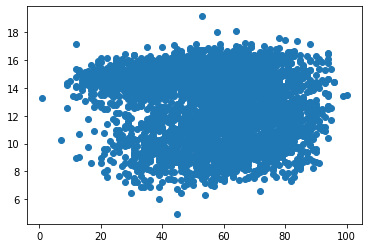

In [209]:
#checking which variables are showcasing a relationship
plt.scatter(X_train['Metascore'], Y_train)

ValueError: Length of values (1) does not match length of index (4239)

In [245]:
from sklearn.linear_model import LinearRegression

# Fit Linear Regression
linear_reg = LinearRegression().fit(X_train, Y_train)

# Obtain Coefficient of Determination
r_sq = linear_reg.score(X_train, Y_train)
print(f'Coefficient of Determination: {r_sq}')
print(f'intercept: {linear_reg.intercept_}')
print(f'slope: {linear_reg.coef_}')

Coefficient of Determination: 0.5196881227746324
intercept: [11.48967425]
slope: [[-0.07048102  0.16969601  0.15809937  0.15051677  0.07742197  0.00045261
   0.01317701  0.00050124  0.00581739 -0.12778497]]


In [246]:

linear_reg.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}